## Exploring Exoplanets

### *“To confine our attention to terrestrial matters would be to limit the human spirit.”* -Stephen Hawking

The study of exoplanets, which are planets that orbit other stars, is a fascinating new field in astronomy.  Only in recent years has it become possible to detect exoplanets, and it is still nearly impossible to view them directly.  Unlike the stunning images we see from Hubble, with exoplanets we typically get only numerical data, and occasionally artistic renderings that involve a lot of guesswork.  The purpose of this project is to show what we know about exoplanets in a way that is accurate, accessible, and visually compelling for people who are not professional astronomers.

I used the following dataset on Kaggle: https://www.kaggle.com/mrisdal/open-exoplanet-catalogue

The dataset consists of 3584 rows and 25 columns.  Each row is one exoplanet, or possible exoplanet. The dataset also includes the planets in our solar own system, including Earth.  Each column contains one feature, such as mass, radius, orbital period, etc.

The dataset contains a wealth of information about exoplanets.  This includes information about the planets themselves, how and when they were discovered, and details about their host stars.  There exists a wide variety of exoplanets, some of which may be quite similar to Earth, and others which are probably very different.

### Acquiring and Cleaning the Data

In [1]:
# Import the main modules we will be using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Ingest the Exoplanet data
oec = pd.read_csv('./planet_data/oec.csv')
oec.shape

(3584, 25)

Right away we see that the dataset has a high number of null values. In fact, there are certain columns with almost all null values. In our analysis we will focus on the more complete columns, and we have different ways of dealing with null values if they become an issue.

In [3]:
# Have a quick look...
oec.head(20)

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.21960,0.0370,270.60,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.3620,-0.310,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.41230,0.0500,190.00,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.3620,-0.310,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.05400,0.176891,0.00480,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.4500,0.000,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.11400,4.194525,0.03900,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.4500,0.000,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.07100,6.356006,0.05200,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.4500,0.000,3584.0,NaN,Controversial
5,Kepler-9 b,0,0.2500,0.84000,19.224180,0.14300,0.0626,NaN,NaN,NaN,...,15/12/03,19 02 17,+38 24 03,650.000,1.070,1.0200,0.120,5777.0,NaN,Confirmed planets
6,Kepler-9 c,0,0.1700,0.82000,39.031060,0.22900,0.0684,NaN,NaN,NaN,...,15/12/03,19 02 17,+38 24 03,650.000,1.070,1.0200,0.120,5777.0,NaN,Confirmed planets
7,Kepler-9 d,0,0.0220,0.14700,1.592851,0.02710,NaN,NaN,NaN,NaN,...,14/03/10,19 02 17,+38 24 03,650.000,1.070,1.0200,0.120,5777.0,NaN,Confirmed planets
8,GJ 160.2 b,0,0.0321,NaN,5.235400,0.05300,0.0600,350.00,NaN,NaN,...,15/04/21,04 06 34.84136,-20 51 11.2391,43.250,0.690,NaN,NaN,4347.0,NaN,Controversial
9,Kepler-566 b,0,NaN,0.19200,18.427946,NaN,NaN,NaN,NaN,NaN,...,16/05/10,19 26 13,+47 48 52,NaN,0.830,0.7900,-0.010,5132.0,NaN,Confirmed planets


In [4]:
# See which columns are most complete
oec.count()

PlanetIdentifier        3584
TypeFlag                3584
PlanetaryMassJpt        1313
RadiusJpt               2774
PeriodDays              3485
SemiMajorAxisAU         1406
Eccentricity            1108
PeriastronDeg            328
LongitudeDeg              43
AscendingNodeDeg          46
InclinationDeg           665
SurfaceTempK             741
AgeGyr                     2
DiscoveryMethod         3521
DiscoveryYear           3574
LastUpdated             3576
RightAscension          3574
Declination             3574
DistFromSunParsec       2133
HostStarMassSlrMass     3416
HostStarRadiusSlrRad    3263
HostStarMetallicity     2509
HostStarTempK           3455
HostStarAgeGyr           517
ListsPlanetIsOn         3584
dtype: int64

As it turns out, a number of planets in the dataset may not be real.  The table below below shows that many are listed as controversial, retracted planet candidates, or objects of interest.  For our analysis, we will remove these rows in the dataset and take into account only those planets that we are certain exist.

In [5]:
class_count = oec[['PlanetIdentifier','ListsPlanetIsOn']].groupby('ListsPlanetIsOn').count()
class_count

,PlanetIdentifier
ListsPlanetIsOn,
Confirmed planets,3295
"Confirmed planets, Orphan planets",2
"Confirmed planets, Planets in binary systems, P-type",21
"Confirmed planets, Planets in binary systems, P-type, Planets in globular clusters",1
"Confirmed planets, Planets in binary systems, S-type",135
"Confirmed planets, Planets in open clusters",13
Controversial,72
"Controversial, Planets in binary systems, P-type",7
"Controversial, Planets in binary systems, S-type",20


In [6]:
# Remove controversial planets
data = oec[~oec['ListsPlanetIsOn'].isin(['Controversial','Controversial, Planets in binary systems, S-type',
            'Controversial, Planets in binary systems, P-type','Kepler Objects of Interest',
            'Retracted planet candidate'])]
data.shape

(3477, 25)

Another issue is that this dataset contains some objects that are probably too big to be considered planets.  The line between planet and star is actually not well defined.  Some stars orbit other stars in binary systems, and some "rogue planets" do not orbit stars.  In order to avoid skewing our dataset, we will remove all objects more than twice the radius or thirteen times the mass of Jupiter, since such objects are generally considered to be brown dwarves or "failed stars".

In [7]:
# Remove objects too large to be planets
data = data[~(data['PlanetaryMassJpt'] > 13)]
data = data[~(data['RadiusJpt'] > 2)]
data.shape

(3440, 25)

### Intial Analysis

Now that we have cleaned the data a little we can start with the analysis.  In the plot below we can see how and when exoplanets have been discovered.  The first few exoplanets were found in the 1990s, however the vast majority have been discovered during the past few years.  This dataset was last updated in early 2017.

The transit method is the way the majority of exoplanets have been discovered.  This is when a planet passes in front of its host star, causing the star's light to dim a tiny amount.  The second most common method is radial velocity, which measures the gravitational effect a planet exerts on its host star, causing the star to wobble slightly.  The discovery method often determines what we know about a planet.  For example, with the radial velocity method, we may know a planet’s mass, but not its radius.  With the transit method, we may know a planet's radius but not its mass.  Most of the exoplanets dicovered using the transit method were identified by NASA's Kepler space telescope which was launched in 2009, but sadly was retired in 2018.

In [8]:
year_method = data[['DiscoveryYear','DiscoveryMethod']]
year_method = year_method.dropna()
year_method = year_method[year_method['DiscoveryYear'] > 1990]

Text(0, 0.5, 'Number of Planets')

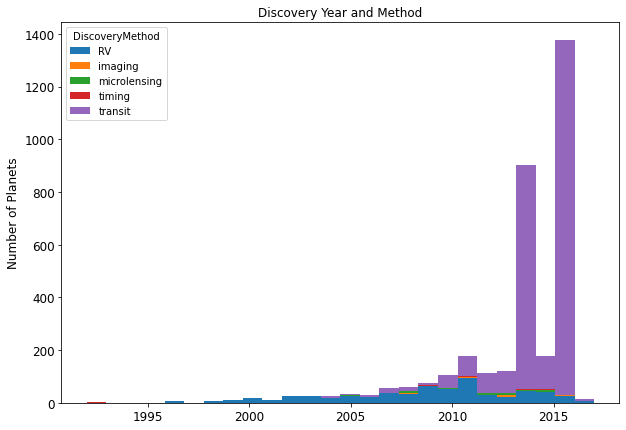

In [9]:
ax = year_method.pivot(columns='DiscoveryMethod').DiscoveryYear.plot(figsize=(10, 7), title='Discovery Year and Method',
                                                                    kind ='hist', bins=26, 
                                                                    stacked=True, fontsize=12)

ax.set_ylabel("Number of Planets", fontsize=12)

The next plot shows how far away the planets are in parsecs, along with discovery method.  One parsec is about 3.26 light-years.  We can see that most of the stars where we have detected planets are in our own galactic neighborhood, although some of the stars are much further away.  For perspective, the Milky Way is about 30,000 parsecs in diameter.  

We also see that radial velocity and imaging are primarily used for detecting nearby planets, while the most distant ones are detected using microlensing.  This is a complicated method involving the distortion of spacetime by gravitational fields, as predicted by Einstein's theory of General Relativity.

In [10]:
dist_method = data[['DiscoveryMethod','DistFromSunParsec']]
dist_method = dist_method.dropna()

Text(0, 0.5, 'Number of Planets')

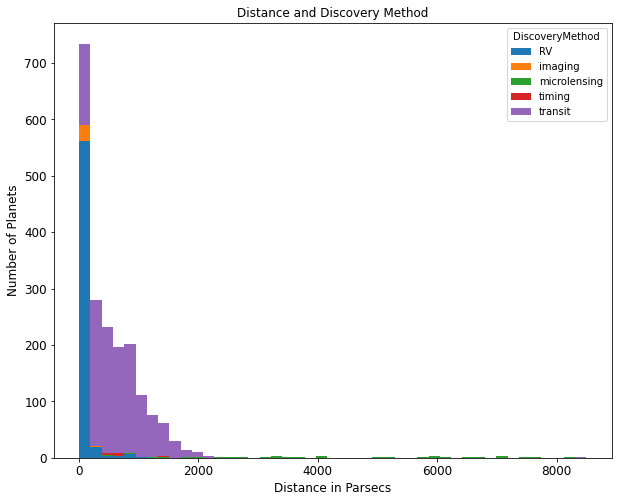

In [11]:
ax = dist_method.pivot(columns='DiscoveryMethod').DistFromSunParsec.plot(kind ='hist', figsize=(10, 8), 
                                                                         title='Distance and Discovery Method', bins=45, 
                                                                         stacked=True, fontsize=12)
ax.set_xlabel("Distance in Parsecs", fontsize=12)
ax.set_ylabel("Number of Planets", fontsize=12)

### Exoplanet Size

Now we can start to look at the characteristics of the planets themselves. First, we see that the average planetary mass is 1.87 times the mass of Jupiter, or 595 times the mass of Earth. The average radius is 0.36 times the radius of Jupiter, about 4 times the radius of Earth. These two measurements together tell us that most of the planets we detected are quite large. Notably, the minimum value for both mass and radius belongs to our very own Pluto, which is included in the dataset despite being to small to technically be considered a planet.

In [12]:
size_features = ['PlanetaryMassJpt','RadiusJpt']
size_df = data.loc[:, size_features]
size_df.describe()

,PlanetaryMassJpt,RadiusJpt
count,1204.000000,2731.000000
mean,1.869628,0.364147
std,2.535154,0.393698
min,0.000008,0.016438
25%,0.184500,0.141125
50%,0.910500,0.209000
75%,2.264750,0.317500
max,13.000000,1.991000


In [13]:
groups = data.groupby('DiscoveryMethod')
sol_sys = data[data['ListsPlanetIsOn']=='Solar System']

In the plot below we see that although there is a correlation between planet mass and planet radius, it is lower than we might expect, at around 0.33. The colors show the methods used to detect the exoplanets, with the planets in our own solar system shown in black.

Correlation between mass and radius: 0.33467148102650623


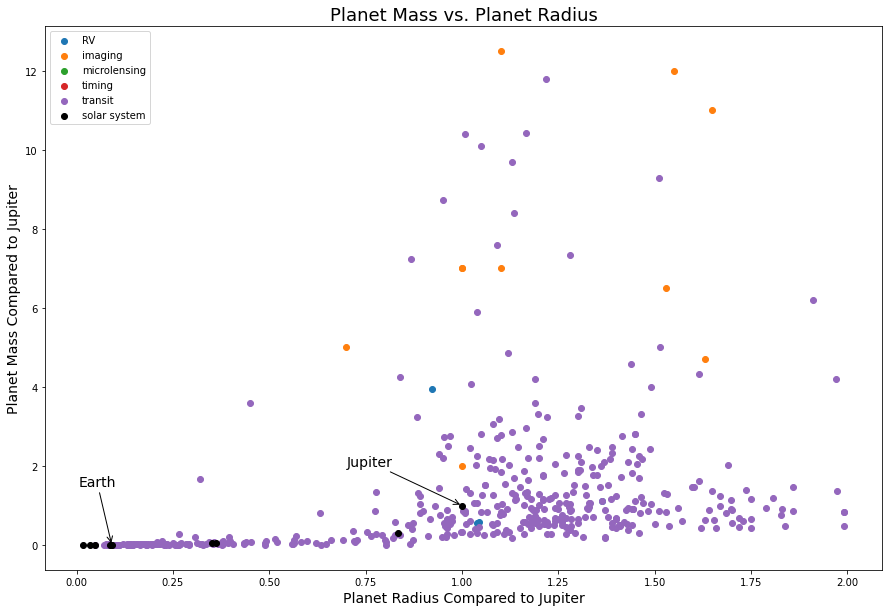

In [14]:
plt.figure(figsize=(15, 10))
plt.title('Planet Mass vs. Planet Radius', fontsize=18)
plt.xlabel('Planet Radius Compared to Jupiter', size=14)
plt.ylabel('Planet Mass Compared to Jupiter', size=14)

for name, group in groups:
    plt.scatter(group['RadiusJpt'], group['PlanetaryMassJpt'], label=name)
plt.scatter(sol_sys['RadiusJpt'], sol_sys['PlanetaryMassJpt'], c='k', label='solar system')
plt.legend(loc='upper left')

plt.annotate("Jupiter",
            xy=(1, 1), xycoords='data',
            xytext=(0.7, 2), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            size=14)

plt.annotate("Earth",
            xy=(0.091130, 0.003146), xycoords='data',
            xytext=(0.004, 1.5), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            size=14)

print('Correlation between mass and radius:', data['PlanetaryMassJpt'].corr(data['RadiusJpt']))

### Exoplanet Orbits

The average maximum distance between a planet and its host star (semi major axis) is 1.86 Astronomical Units, almost twice the distance between the Earth and the Sun. Interestingly though, the median distance is only 0.16 AU, or less than half the distance between Mercury and the Sun, while the maximum distance is 662 AU.  This means that most of the planets that we have detected orbit very close to their host stars, but there are a few that orbit very far away, and this has a large effect on the average. The data for orbital period is quite similar. The average exoplanet year lasts 428 Earth days, althouth the median is only 12.6 days, and the maximum is 200,883 Earth days (550 Earth years!)

In [17]:
orbit_features = ['SemiMajorAxisAU','PeriodDays']
orbit_df = data.loc[:, orbit_features]
orbit_df.describe()

,SemiMajorAxisAU,PeriodDays
count,1291.000000,3367.000000
mean,1.859269,428.383329
std,19.529846,5281.262281
min,0.004420,0.090706
25%,0.051950,4.654451
50%,0.162000,12.620000
75%,1.200000,45.963867
max,662.000000,200883.210000


The plots below shows each planet’s maximum distance from its star compared its orbital period in Earth days. Again the colors correspond to discovery method, and the planets in our own solar system are shown in black.  In the first plot we see that exoplanets discovered by imaging tend to have orbits quite far from their host stars. In the second plot there is a very dense smudge of purple in the bottom left corner. Remember that the majority of the exoplanets that we know about have been discovered using the transit method, which is most effective at finding planets with orbits very close to their host stars. The relationship between orbital period and orbital distance is defined by the following equation where orbital distance ($\alpha$) is a function of the host star's mass (M) and orbital period (T): 

$$\alpha = \sqrt[3]{\frac{GMT^2}{4\pi^2}}$$

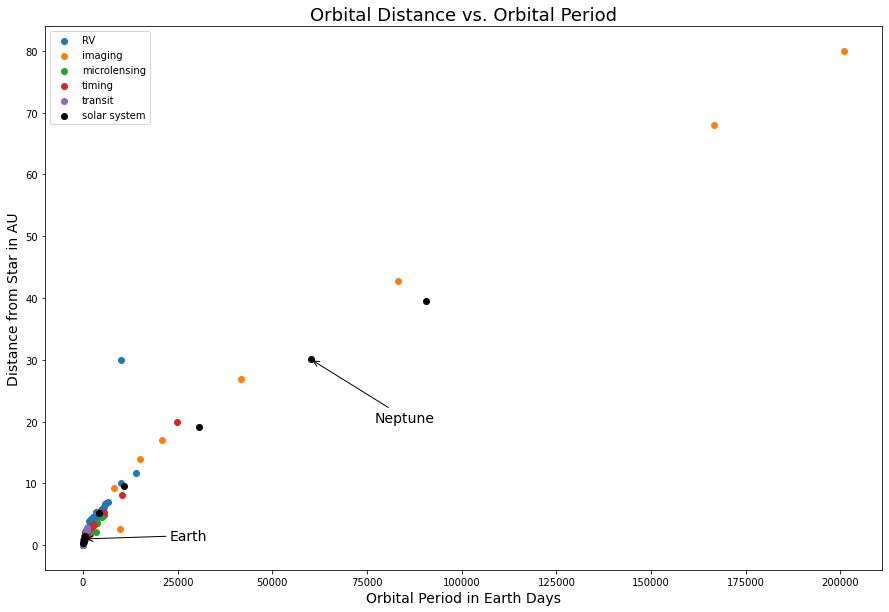

In [18]:
plt.figure(figsize=(15, 10))
plt.title('Orbital Distance vs. Orbital Period',fontsize=18)
plt.xlabel('Orbital Period in Earth Days', size=14)
plt.ylabel('Distance from Star in AU', size=14)

for name, group in groups:
    plt.scatter(group['PeriodDays'], group['SemiMajorAxisAU'], label=name)

plt.scatter(sol_sys['PeriodDays'], sol_sys['SemiMajorAxisAU'], c='k', label='solar system')

plt.annotate("Neptune",
            xy=(60190, 30.07), xycoords='data',
            xytext=(77000, 20), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            size=14)

plt.annotate("Earth",
            xy=(365.24, 1), xycoords='data',
            xytext=(23000, 0.9), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            size=14)

plt.legend()
plt.show()

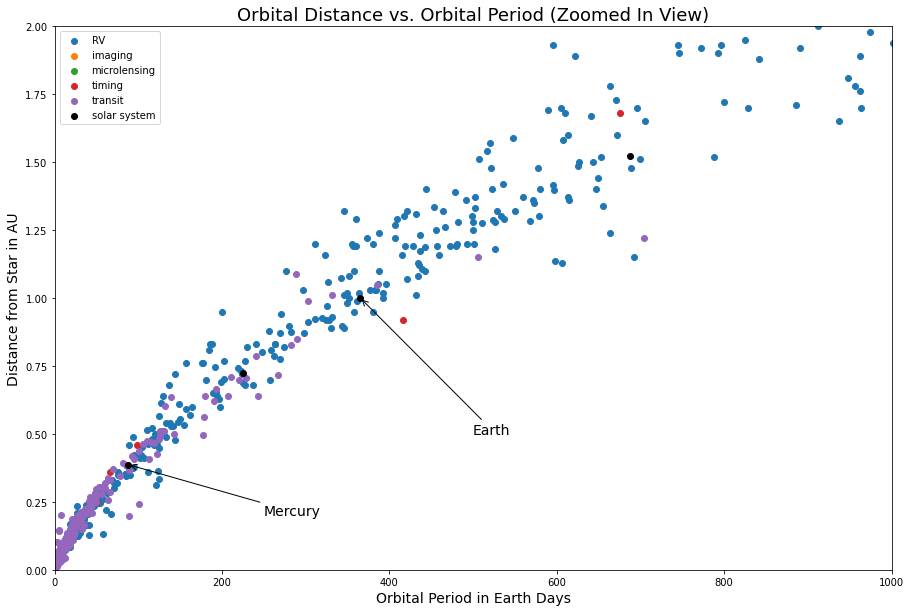

In [20]:
plt.figure(figsize=(15, 10))
plt.title('Orbital Distance vs. Orbital Period (Zoomed In View)',fontsize=18)
plt.xlabel('Orbital Period in Earth Days', size=14)
plt.ylabel('Distance from Star in AU', size=14)
plt.axis([0, 1000, 0, 2])

for name, group in groups:
    plt.scatter(group['PeriodDays'], group['SemiMajorAxisAU'], label=name)

plt.scatter(sol_sys['PeriodDays'], sol_sys['SemiMajorAxisAU'], c='k', label='solar system')

plt.annotate("Earth",
            xy=(365.24, 1), xycoords='data',
            xytext=(500, 0.5), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            size=14)

plt.annotate("Mercury",
            xy=(87.97, 0.387), xycoords='data',
            xytext=(250, 0.2), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            size=14)

plt.legend()
plt.show()

### Determining Habitabilty 

Perhaps the most intriguing question regarding exoplanets is how similar are they to Earth. In fact, the possibility of finding Earth-like planets is arguably the most compelling reason to search for exoplanets at all. Do any of these planets have conditions that could support life? As we peer out at them, might there be something peering back? Could they some day serve as destinations for future generations of spacefaring humans? In the following sections we will look at the features that may help determine whether or not an exoplanet could be habitable. First we will attempt to create our own ranking system based on a set of features. Next, we will create machine learning algorithms to classify  exoplanets as potentially habitable or not. 

We will start by creating a new dataframe with features that may contribute to habitability. Remember that some columns in this dataset have mostly null values, so we will also have to limit ourselves to looking at the columns that are more complete. 

In [34]:
# Create a new dataframe with habitability features
habitability_features = ['PlanetIdentifier', 'PlanetaryMassJpt', 'RadiusJpt','PeriodDays', 'SemiMajorAxisAU', 
                  'HostStarMassSlrMass','HostStarRadiusSlrRad', 'HostStarTempK']
hab_df = data.loc[:, habitability_features]
hab_df.head()

,PlanetIdentifier,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarTempK
0,HD 143761 b,1.045,NaN,39.845800,0.2196,0.889,1.362,5627.0
1,HD 143761 c,0.079,NaN,102.540000,0.4123,0.889,1.362,5627.0
5,Kepler-9 b,0.250,0.840,19.224180,0.1430,1.070,1.020,5777.0
6,Kepler-9 c,0.170,0.820,39.031060,0.2290,1.070,1.020,5777.0
7,Kepler-9 d,0.022,0.147,1.592851,0.0271,1.070,1.020,5777.0


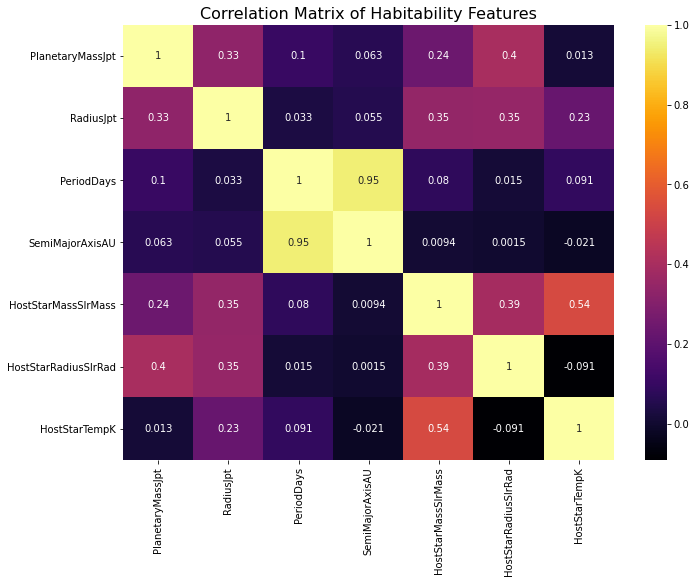

In [35]:
# Create a correlation matrix to see how different features relate to each other
import seaborn as sns
corrmat = hab_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(11, 8))
plt.title('Correlation Matrix of Habitability Features',fontsize=16)
ax = sns.heatmap(hab_df[top_corr_features].corr(), annot=True, cmap='inferno')
bottom, top = ax.get_ylim()

In the next few cells we will reduce the number of dimensions to further prepare the data for classification.  We will start by creating a column for host star luminosity compared to that of the Sun.  Since we are working in solar units, the formula is simply:
$$L=T^4R^2$$

In this formula L is luminosity in sols, T is temperature, normalized by dividing by the temperature of the Sun, and R is stellar radius compared to the radius of the Sun. We can then drop the columns for host star temperature and radius.

In [36]:
hab_df['HostStarSlrLum'] = ((hab_df['HostStarTempK'] / 5778.0)**4 * (hab_df['HostStarRadiusSlrRad'])**2)
hab_df.drop(['HostStarTempK', 'HostStarRadiusSlrRad'], axis=1, inplace=True)
hab_df.head()

,PlanetIdentifier,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,HostStarMassSlrMass,HostStarSlrLum
0,HD 143761 b,1.045,NaN,39.845800,0.2196,0.889,1.668598
1,HD 143761 c,0.079,NaN,102.540000,0.4123,0.889,1.668598
5,Kepler-9 b,0.250,0.840,19.224180,0.1430,1.070,1.039680
6,Kepler-9 c,0.170,0.820,39.031060,0.2290,1.070,1.039680
7,Kepler-9 d,0.022,0.147,1.592851,0.0271,1.070,1.039680


Next, we fill in missing values for semi major axis using the same equation we saw earlier where orbital distance is expressed as a function of orbital period and host star mass:
$$\alpha = \sqrt[3]{\frac{GMT^2}{4\pi^2}}$$

Since we are working in AU, we can ignore the gravitational constant (G), and we need to divide period (T) by the number of days in an Earth year. We are also ignoring orbital eccentricity for the sake of simplicity.

In [37]:
hab_df.SemiMajorAxisAU.fillna((hab_df.HostStarMassSlrMass*(hab_df.PeriodDays/365.2422)**2)**(1./3), inplace=True)
hab_df.drop(['PeriodDays', 'HostStarMassSlrMass'], axis=1, inplace=True)
hab_df.head()

,PlanetIdentifier,PlanetaryMassJpt,RadiusJpt,SemiMajorAxisAU,HostStarSlrLum
0,HD 143761 b,1.045,NaN,0.2196,1.668598
1,HD 143761 c,0.079,NaN,0.4123,1.668598
5,Kepler-9 b,0.250,0.840,0.1430,1.039680
6,Kepler-9 c,0.170,0.820,0.2290,1.039680
7,Kepler-9 d,0.022,0.147,0.0271,1.039680


Now we will fill in the the missing values for planetary radius using planetary mass. This is difficult to do, since the correlation between mass and radius was not very high.  What we can do is assume Earth density, effectively giving planets with unknown radii the "benefit of the doubt". This will underestimate the radius of many massive planets that are probably gas giants with low density, however this should not affect our classification since these are not likely candidates for habitability.

The constant we are using (around 0.24) is Jupiter's density compared to Earth, however it might be more logical to think of this as dividing by Earth's density compared to Jupiter. This gives us the exoplanet's volume compared to Jupiter's volume (again assuming Earth density). Next we take the cube root since volume scales at a cubic rate compared to radius, and again we can ignore constants since we are working in Jupiter units. Finally, we drop the column for Planetary mass, because we have missing values for more than half of our samples.

In [38]:
hab_df.loc[(pd.isnull(hab_df.RadiusJpt)), 'RadiusJpt'] = (hab_df.PlanetaryMassJpt * 0.240561)**(1./3)
hab_df.drop(['PlanetaryMassJpt'], axis=1, inplace=True)

hab_df.head()

,PlanetIdentifier,RadiusJpt,SemiMajorAxisAU,HostStarSlrLum
0,HD 143761 b,0.631123,0.2196,1.668598
1,HD 143761 c,0.266860,0.4123,1.668598
5,Kepler-9 b,0.840000,0.1430,1.039680
6,Kepler-9 c,0.820000,0.2290,1.039680
7,Kepler-9 d,0.147000,0.0271,1.039680


To make things easier we will convert our radius column from Jupiter radii to Earth radii, since our goal is to determine how similar exoplanets are to Earth. Earth will now have a score of 1 for each of the feature columns.

In [39]:
# Convert radius unit from Jupiter radius to Earth radius
hab_df['RadEarth'] = hab_df['RadiusJpt'] / 0.091130
hab_df.drop(['RadiusJpt'], axis=1, inplace=True)

hab_df.head()

,PlanetIdentifier,SemiMajorAxisAU,HostStarSlrLum,RadEarth
0,HD 143761 b,0.2196,1.668598,6.925521
1,HD 143761 c,0.4123,1.668598,2.928348
5,Kepler-9 b,0.1430,1.039680,9.217601
6,Kepler-9 c,0.2290,1.039680,8.998135
7,Kepler-9 d,0.0271,1.039680,1.613080


In [40]:
hab_df = hab_df.dropna()
len(hab_df)

3022

In the cell below, we will create a new column that gives each planet a score based on how Earth-like it is.  The score is set up as a loss function, so lower values mean greater similarity to Earth. Not surprisingly, Earth ranks in as the most Earth-like planet. Earth's score would be a perfect zero were it not for tiny rounding errors in Python. The second most Earth-like planet is Kepler-186 f, which is slightly larger than Earth and orbits star at the right distance to have liquid water on its surface.

In [41]:
hab_df['EarthLike'] = abs((hab_df['HostStarSlrLum']-hab_df['SemiMajorAxisAU']**3)/hab_df['SemiMajorAxisAU']**2)+abs(1-hab_df['RadEarth']**3)
hab_df.loc[hab_df['EarthLike'] > 50, 'EarthLike'] = 50
score_df = hab_df.sort_values(by=['EarthLike'])
score_df.head()

,PlanetIdentifier,SemiMajorAxisAU,HostStarSlrLum,RadEarth,EarthLike
410,Earth,1.00000,1.000000,1.000003,0.000010
1506,Kepler-186 f,0.35600,0.041154,1.086665,0.314453
2570,TRAPPIST-1 f,0.03710,0.000527,1.045002,0.486716
2571,TRAPPIST-1 g,0.04510,0.000527,1.127005,0.645290
2569,TRAPPIST-1 e,0.02817,0.000527,0.918007,0.861887


Now we will add a binary column for habitabilty based on list of potentially habitable exoplanets from Wikipedia
We will use this list to test the accuracy of our ranking system, and later to help train and test our machine learning classifiers.  Here is a link to the list (which may have since been updated):  https://en.wikipedia.org/wiki/List_of_potentially_habitable_exoplanets 

According to the article, the list is based on data from the NASA Exoplanet Archive and the Habitable Exoplanet Catalogue (HEC). Remember, the key word is "potentially". No one has seen any of these planets up close, but the little we know about them indicates a there is possibility that they could be habitable. (Notice that we have added Earth to the list below.)

In [42]:
hab_df['PotentiallyHabitable'] = (hab_df['PlanetIdentifier'].isin(['Proxima Centauri b', 'Gliese 667 C c', 
        'Kepler-442 b', 'Kepler-452 b', 'Wolf 1061 c', 'Kepler-1229 b', 'Kapteyn b', 'Kepler-62 f', 'Kepler-186 f', 
        'Luyten b', 'TRAPPIST-1 d', 'TRAPPIST-1 e', 'TRAPPIST-1 f', 'TRAPPIST-1 g', 'LHS 1140 b', 'Kepler-1638 b',
        'Earth']))*1

Below are all of the planets belonging to the list of Potentially Habitable Exoplanets (plus Earth). The only one missing is Kapteyn b, which we deleted from the dataset because its status was listed as "controversial". Looking at these planets, we see that almost all of them orbit very close to stars that are much dimmer than our Sun. This is not surprising because most of the planets we have found orbit very close to their host stars, which probably owes to the fact that such planets are easier to detect.

In [43]:
pos_df=hab_df.loc[hab_df['PotentiallyHabitable'] == 1]
pos_df.head(15)

,PlanetIdentifier,SemiMajorAxisAU,HostStarSlrLum,RadEarth,EarthLike,PotentiallyHabitable
410,Earth,1.000000,1.000000,1.000003,0.000010,1
784,Kepler-1638 b,0.787855,0.860759,1.832547,5.752978,1
858,Kepler-452 b,1.046000,1.214285,1.630001,3.394588,1
1123,Wolf 1061 c,0.084270,0.007593,1.620996,4.244345,1
1400,Kepler-62 f,0.718000,0.209506,1.410004,2.114854,1
1506,Kepler-186 f,0.356000,0.041154,1.086665,0.314453,1
1918,Gliese 667 C c,0.125000,0.018995,1.560456,3.890417,1
1971,Proxima Centauri b,0.048500,0.001544,1.091322,0.907457,1
2025,Kepler-442 b,0.409000,0.120474,1.316800,1.594470,1
2568,TRAPPIST-1 d,0.021440,0.000527,0.772007,1.664206,1


Now we can compare our own ranking system to the list from Wikpedia. Of our top 15 most Earth-like planets, 9 of them are on the Potentially Habitable list, as well as all of the top 5.

In [45]:
score_df = hab_df.sort_values(by=['EarthLike'])
score_df.head(15)

,PlanetIdentifier,SemiMajorAxisAU,HostStarSlrLum,RadEarth,EarthLike,PotentiallyHabitable
410,Earth,1.000000,1.000000,1.000003,0.000010,1
1506,Kepler-186 f,0.356000,0.041154,1.086665,0.314453,1
2570,TRAPPIST-1 f,0.037100,0.000527,1.045002,0.486716,1
2571,TRAPPIST-1 g,0.045100,0.000527,1.127005,0.645290,1
2569,TRAPPIST-1 e,0.028170,0.000527,0.918007,0.861887,1
1263,Kepler-446 c,0.104000,0.006579,1.110008,0.871914,0
1971,Proxima Centauri b,0.048500,0.001544,1.091322,0.907457,1
3066,Kepler-445 d,0.200000,0.003930,1.250005,1.054893,0
409,Venus,0.723321,1.000000,0.949906,1.330899,0
3093,GJ 3323 c,0.126400,0.001265,1.322082,1.358077,0


Below is a plot showing the data from the table above. The x axis shows the exoplanets' distance from their host stars in AU, and the y axis shows host star luminosity. The plot shows each planet's relative size. The color is determined by each planet's score according to the "Earth Likeness" ranking system that we created, and the planets from the Potentially Habitable list are circled in red. There is a red dotted line showing the distance a planet needs to be from its host star to receive Earth levels of radiation. Annotations can be seen for several of the planets on the list, as well as Venus and Mars. The planets are not plotted in any particular order, and many of them are quite large, so they often overlap with each other. This is especially an issue on the far left side of the plot where there is a very number of planets. Again, this is a result of the fact that larger planets and/or planets that orbit close to their stars are easier to detect.

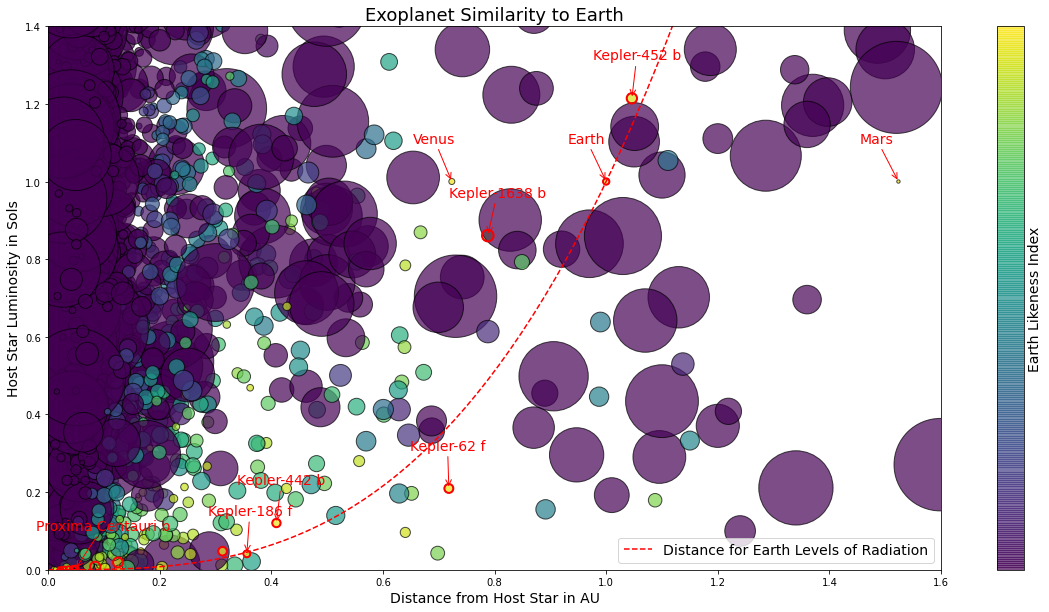

In [47]:
Z = hab_df['SemiMajorAxisAU'] 
Y = hab_df['HostStarSlrLum']
S = hab_df['RadEarth']

plt.figure(figsize=(20, 10))
plt.title('Exoplanet Similarity to Earth',fontsize=18)
plt.xlabel('Distance from Host Star in AU',fontsize=14)
plt.ylabel('Host Star Luminosity in Sols',fontsize=14)
plt.axis([0, 1.6, 0, 1.4])

x = np.linspace(0, 2, 100)
plt.plot(x, x**3, 'r--', label='Distance for Earth Levels of Radiation')

plt.legend(loc='lower right',fontsize=14)

sc = plt.scatter(Z, Y, (S**2)*40, alpha=0.7, c=-hab_df['EarthLike'], cmap=plt.cm.viridis, edgecolors='k')
cbar = plt.colorbar(sc)
cbar.set_ticks([])
cbar.set_label('Earth Likeness Index',fontsize=14)

J = pos_df['SemiMajorAxisAU']
K = pos_df['HostStarSlrLum']
I = pos_df['RadEarth']

plt.scatter(J, K, (I**2)*40, linewidths=2, c='none', edgecolors='red')

planet_list = ['Earth', 'Mars', 'Venus', 'Proxima Centauri b', 'Kepler-442 b', 'Kepler-452 b', 'Kepler-62 f', 
               'Kepler-186 f', 'Kepler-1638 b']

for name in planet_list:
    coords = hab_df.loc[hab_df.PlanetIdentifier == name,['SemiMajorAxisAU', 'HostStarSlrLum']].values.flatten()
    plt.annotate(name,
                xy=(coords[0], coords[1]), xycoords='data',
                xytext=(coords[0]-0.07,coords[1]+0.1), textcoords='data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='r'),
                size=14, c='r')        

plt.show()

### Classification with Machine Learning

In the following sections we will try out several different machine learning algorithms in an attempt to build a classifier that can automatically classify exoplanets as potentially habitable or non-habitable. First, we will select a set of features from the dataframe for training the models and use those features to create a new dataframe called "X". Next, we will convert the binary Potentially Habitable column into a numpy array called 'y' for the true classes.

One challenge with this data is that it is highly imbalanced.  Out of 3022 planets in the dataset only 14 are positive (meaning they have a 1 in the Potentially Habitable column). This means that a classifier could, for example, classify all of the exoplanets as not habitable and still achieve over 99% accuracy. It also means that the model might not have enough examples to learn what factors make a planet habitable, especially if we are further dividing up the data into training and test sets.

In [48]:
# Select the features for training the model and create a new dataframe
features = ['SemiMajorAxisAU', 'HostStarSlrLum', 'RadEarth']
X = hab_df.loc[:, features]
X.head()

,SemiMajorAxisAU,HostStarSlrLum,RadEarth
0,0.2196,1.668598,6.925521
1,0.4123,1.668598,2.928348
5,0.1430,1.039680,9.217601
6,0.2290,1.039680,8.998135
7,0.0271,1.039680,1.613080


In [49]:
# Convert the column we added to a numpy array for "true" predictions
y=np.ravel(hab_df['PotentiallyHabitable'])
y

array([0, 0, 0, ..., 0, 0, 0])

### Logistic Regression

The first machine learning technique we are going to use is logistic regression, which returns a probability that examples belong to a given class (in this case "potentially habitable"). To address the issue of imbalanced data we will create two different models. The first will treat all of data equally. The second will balance the class weights by placing more weight on the minority class. Here that means there will be a higher penalty for misclassifying potentially habitable exoplanets. 

We will assess our two models with both a traditional accuracy measurement (number of correct classifications divided by total number of examples) as well the ROC score (sum of the true postitive rate and true negative rate divided by two). The ROC score is often a better way to measure the success of classifiers on imbalanced data. To test the models we will use cross validation. This is a technique in which the data is divided into a number of partitions (we will use 10), and each of those partitions takes turns acting as the test data, while the rest are used to train the model. Cross validation is useful in this situation since there are so few positive examples, and we want to see how the model performs on all of them.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [51]:
lgm_auto = LogisticRegression(random_state=13, class_weight='auto')
lgm_bal = LogisticRegression(random_state=13, class_weight='balanced')

In [52]:
scores_auto = cross_val_score(lgm_auto, X, y, cv=10)
scores_bal = cross_val_score(lgm_bal, X, y, cv=10)

roc_auto = cross_val_score(lgm_auto, X, y, scoring='roc_auc', cv=10)
roc_bal = cross_val_score(lgm_bal, X, y, scoring='roc_auc', cv=10)

print('Mean accuracy with normal weight: ', scores_auto.mean())
print('Mean accuracy with balanced weight: ', scores_bal.mean())
print('\n')
print('Mean ROC AUC with normal weight: ', roc_auto.mean())
print('Mean ROC AUC with balanced weight: ', roc_bal.mean())

Mean accuracy with normal weight:  0.995368609708653
Mean accuracy with balanced weight:  0.7981225274845365


Mean ROC AUC with normal weight:  0.9363698781838317
Mean ROC AUC with balanced weight:  0.9380276854928018


Above we can see that the model with default weights got a much higher accuracy rate than the model with balanced weights, but the ROC score for each of the two models was almost exactly the same. This is somewhat discouraging because we hoped the balanced weight model would achieve a higher ROC score.

Below is the confusion matrix for each model. We see that the first model did what we feared it would and simply classified all of the data as the majority class, so the model is basically useless. The second model manages to correctly identify 12 of the 14 potentially habitable planets, but at the rather high cost of misclassifying about 600 non-habitable planets as potentially habitable. 

In [53]:
preds_auto = cross_val_predict(lgm_auto, X, y, cv=10)
preds_bal = cross_val_predict(lgm_bal, X, y, cv=10)

Confusion Matrices with Normal Weight (above) and Balanced Weight (below):


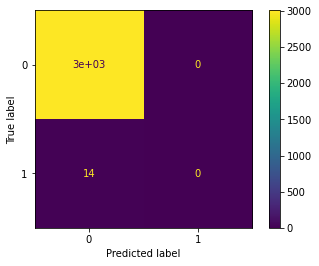

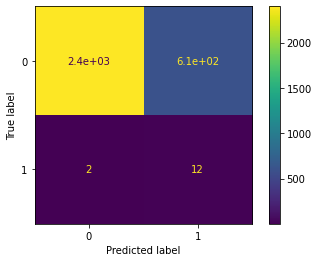

In [54]:
cm1 = confusion_matrix(y, preds_auto)
cm2 = confusion_matrix(y, preds_bal)

print('Confusion Matrices with Normal Weight (above) and Balanced Weight (below):')
cm_display1 = ConfusionMatrixDisplay(cm1, display_labels=[0,1]).plot()
cm_display2 = ConfusionMatrixDisplay(cm2, display_labels=[0,1]).plot()

The plot below shows the ROC curve for the balanced weight model. This takes the probabilities returned by the model and shows the true positive rate compared to the false positive rate at different thresholds of discrimination. Our goal is to maximize the area under the curve. In this case, the model is doing much better than pure chance, but there is quite a bit of room for improvement.

In [55]:
predictions = cross_val_predict(lgm_bal, X, y, cv=10, method='predict_proba')
probs = predictions[:, 1]

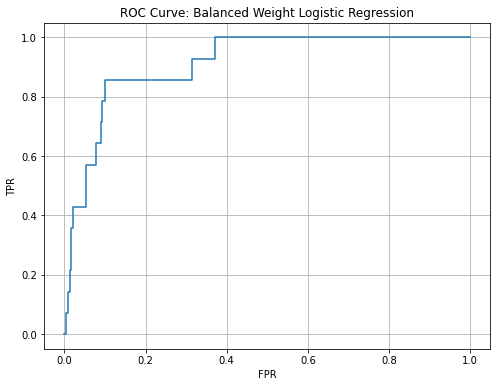

In [56]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y, probs)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve: Balanced Weight Logistic Regression")
plt.grid()
plt.show()

In the following plot, we will have a look at which planets our model classified as potentially habitable. Those planets are shown in green, while the rest are blue. The true positives, which are the planets from the Potentially Habitable list, are again circled in red. We see that the classifier got most of those correct, but it has also mistakenly classified as potentially habitable a number of planets that orbit so close to their host stars that they would be much too hot to support life as we know it. The model has also missed a couple of planets that are on the list, but orbit further away from their stars. Recall most of the positive examples that we are using to train the model are Earth-sized planets that have close orbits around dim stars. The model seems to have trouble realizing that the appropriate distance of a planet from its host star depends on the star's luminosity, and this is probably because there are so few positive examples in the training data.

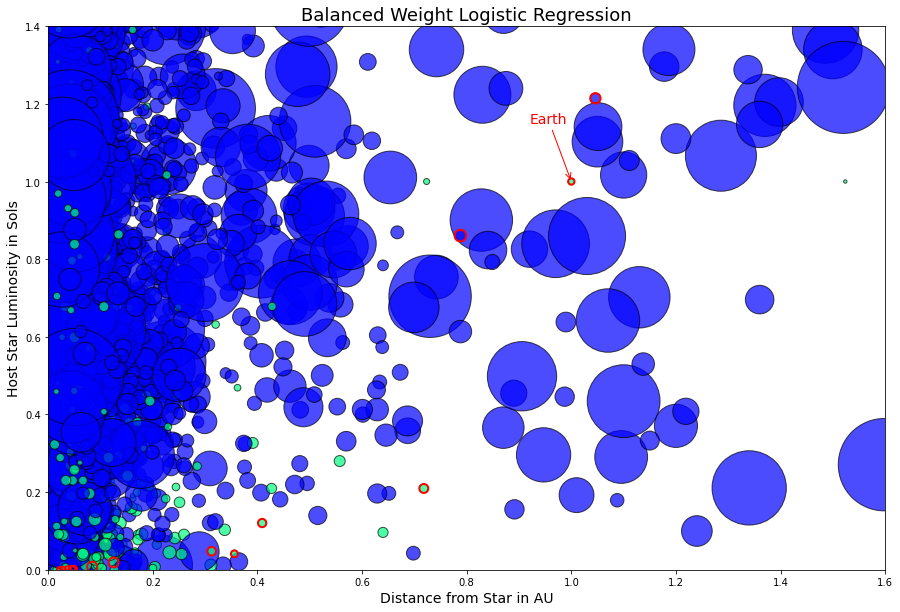

In [58]:
Z = X['SemiMajorAxisAU'] 
Y = X['HostStarSlrLum']
S = X['RadEarth']

plt.figure(figsize=(15, 10))
plt.title('Balanced Weight Logistic Regression',fontsize=18)
plt.xlabel('Distance from Star in AU',fontsize=14)
plt.ylabel('Host Star Luminosity in Sols',fontsize=14)
plt.axis([0, 1.6, 0, 1.4])

plt.scatter(Z, Y, (S**2)*40, alpha=0.7, c=preds_bal, cmap=plt.cm.winter, edgecolors='k')

J = pos_df['SemiMajorAxisAU']
K = pos_df['HostStarSlrLum']
I = pos_df['RadEarth']

plt.scatter(J, K, (I**2)*40, linewidths=2, c='none', edgecolors='red')

plt.annotate("Earth",
            xy=(1, 1), xycoords='data',
            xytext=(.92, 1.15), textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color='r'),
            size=14, c='r')
    

plt.show()

The following plot is similar to the previous one, only this time we the raw probabilities from the model, with the pinker planets rated as having a higher probability of being habitable.

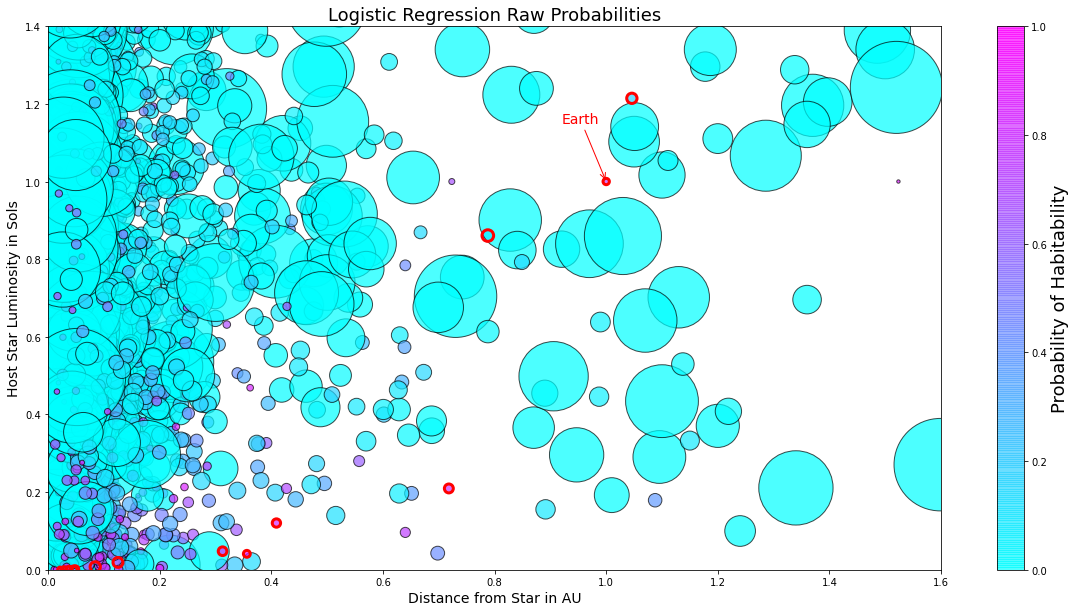

In [59]:
Z = X['SemiMajorAxisAU'] 
Y = X['HostStarSlrLum']
S = X['RadEarth']

plt.figure(figsize=(20, 10))
plt.title('Logistic Regression Raw Probabilities',fontsize=18)
plt.xlabel('Distance from Star in AU',fontsize=14)
plt.ylabel('Host Star Luminosity in Sols',fontsize=14)
plt.axis([0, 1.6, 0, 1.4])

sc = plt.scatter(Z, Y, (S**2)*40, alpha=0.7, c=probs, cmap=plt.cm.cool, edgecolors='k')
cbar = plt.colorbar(sc)
cbar.set_label('Probability of Habitability',fontsize=18)


J = pos_df['SemiMajorAxisAU']
K = pos_df['HostStarSlrLum']
I = pos_df['RadEarth']

plt.scatter(J, K, (I**2)*40, linewidths=3, c='none', edgecolors='red')

plt.annotate("Earth",
            xy=(1, 1), xycoords='data',
            xytext=(.92, 1.15), textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color='r'),
            size=14, c='r')
    

plt.show()

### SMOTE with XGBoost

In the next section we will switch from Logistic Regression to XGBoost, a decision tree classifier that uses gradient boosting. XGBoost creates a sequence of decision trees, and in each new tree places greater weight on the examples it got wrong in the previous tree. The algorithm not only tries to classify each example correctly, but also tries to maximize the distance between each example and the decision boundary. This makes the model more likely to correctly classify new data.

We will pair XGBoost with a technique called SMOTE (Synthetic Minority Oversampling Technique), which we will use to address the imbalanced data. Last time we tried simply increasing the weight on the positive examples, but still had problems because there were not enough potentially habitable planets to properly train the model. With SMOTE we can use the existing positive examples to generate new, synthetic examples to help train the model. In this case, that will mean generating artificial planets that fit the criteria for habitability. At the same time we will undersample the non-habitable planets, so that we have roughly equal numbers of each.

In [60]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

To generate the artificial planets SMOTE uses K Nearest Neighbor. The cell below returns the ROC AUC score for different values of k. The scores are quite similar, but the highest is usually for 3 or 5. Recall that with logistic regression the ROC AUC score was around 0.93, while the combination of SMOTE and XGBoost gives scores over 0.98, so we are already seeing a lot of improvement.

In [61]:
k_values = [1, 3, 5, 7]
for k in k_values:
    # define pipeline
    model = XGBClassifier()
    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=rskf)
    score = np.mean(scores)
    print('k=%d, Mean ROC AUC: %.3f' % (k, score))

k=1, Mean ROC AUC: 0.988
k=3, Mean ROC AUC: 0.987
k=5, Mean ROC AUC: 0.988
k=7, Mean ROC AUC: 0.986


Next we create a pipeline that combines oversampling using SMOTE with random undersampling, which we then use to resample X and y. Looking at the counts printed below we can see how we have made the data much less imbalanced. Before we had 3008 non-habitable planets and only 14 potentially habitable. After resampling there are 600 non-habitable planets and 300 potentially habitable.

In [62]:
over = SMOTE(sampling_strategy=0.1, k_neighbors=5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X1, y1 = pipeline.fit_resample(X, y)
counter = Counter(y)
counter1 = Counter(y1)
print('Before Resampling:', counter)
print('After Resampling:', counter1)

Before Resampling: Counter({0: 3008, 1: 14})
After Resampling: Counter({0: 600, 1: 300})


The plots below show the results of the resampling. The first plot shows the original data, and the second shows the resampled data with the artificial planets. In both plots the potentially habitable planets are shown in orange, while the non-habitable planets are blue.

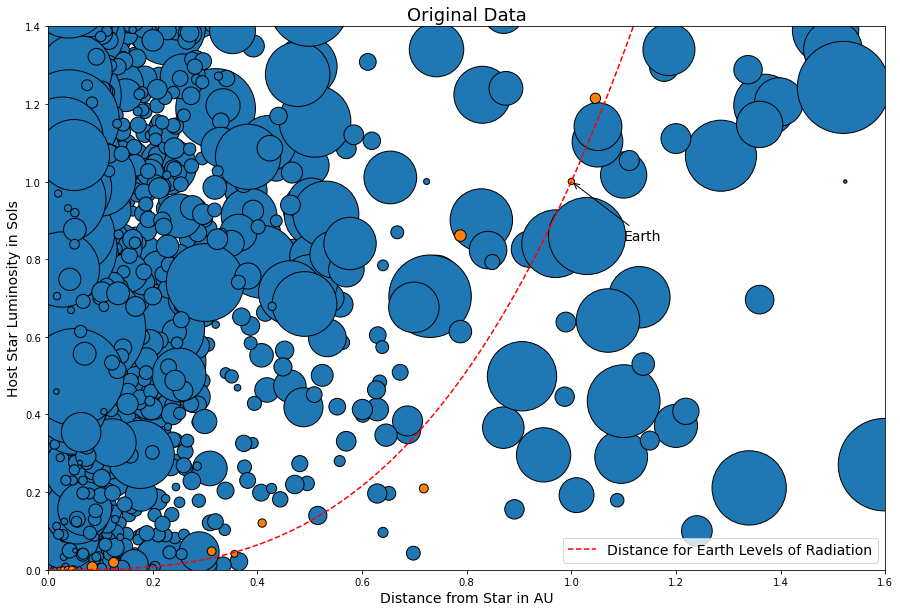

In [63]:
groups = hab_df.groupby('PotentiallyHabitable')
plt.figure(figsize=(15, 10))
plt.title('Original Data',fontsize=18)
plt.xlabel('Distance from Star in AU',fontsize=14)
plt.ylabel('Host Star Luminosity in Sols',fontsize=14)
plt.axis([0, 1.6, 0, 1.4])

x = np.linspace(0, 2, 100)
plt.plot(x, x**3, 'r--', label='Distance for Earth Levels of Radiation')

plt.legend(loc='lower right',fontsize=14)

for name, group in groups:
    plt.scatter(group['SemiMajorAxisAU'], group['HostStarSlrLum'], (group['RadEarth']**2)*40, edgecolors='k')

plt.annotate("Earth",
            xy=(1, 1), xycoords='data',
            xytext=(1.1, 0.85), textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"),
            size=14)

plt.show()

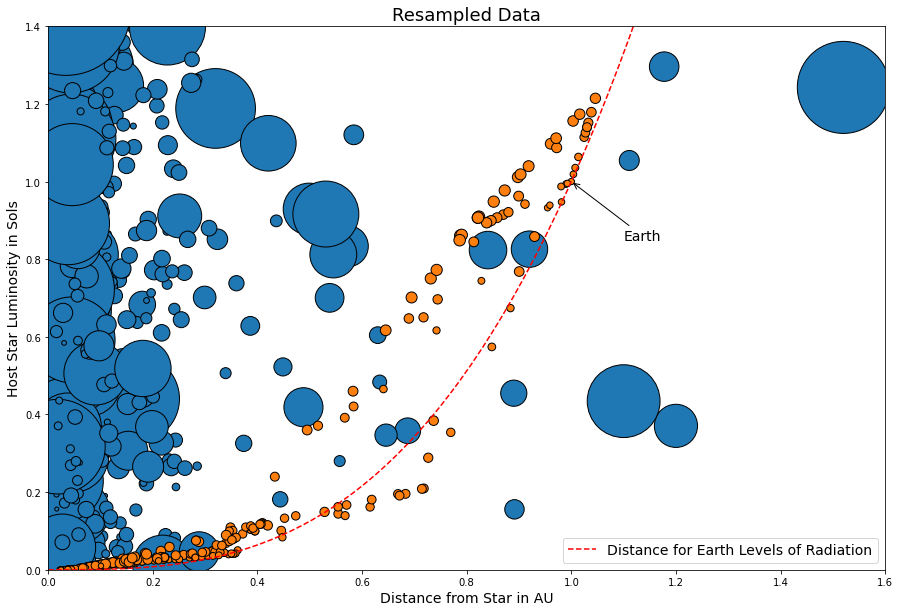

In [64]:
X1['labels'] = y1
groups = X1.groupby('labels')
plt.figure(figsize=(15, 10))
plt.title('Resampled Data',fontsize=18)
plt.xlabel('Distance from Star in AU',fontsize=14)
plt.ylabel('Host Star Luminosity in Sols',fontsize=14)
plt.axis([0, 1.6, 0, 1.4])

x = np.linspace(0, 2, 100)
plt.plot(x, x**3, 'r--', label='Distance for Earth Levels of Radiation')

plt.legend(loc='lower right',fontsize=14)

for name, group in groups:
    plt.scatter(group['SemiMajorAxisAU'], group['HostStarSlrLum'], (group['RadEarth']**2)*40, edgecolors='k')

plt.annotate("Earth",
            xy=(1, 1), xycoords='data',
            xytext=(1.1, 0.85), textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"),
            size=14)

plt.show()

In the cell below we use the resampled data to train the XGBoost classifier, and again we test the results using 10-fold cross validation. The following cell shows the confusion matrix for the results achieved using XGBoost. Different runs produce different results, but in general we obtain about the same number of true positives as we did with logistic regression, while reducing the number of false positives from over 600 to around 40. This is a massive improvement, which is reflected in the ROC curve shown below. The line is now much closer to the upper left corner of the graph, which indicates better results.

In [69]:
model = XGBClassifier()
over = SMOTE(sampling_strategy=0.1, k_neighbors=5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
preds = cross_val_predict(pipeline, X, y, cv=10)

SMOTE with XGBoost Confusion Matrix:


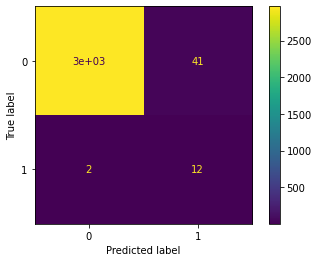

In [70]:
cm = confusion_matrix(y, preds)

print('SMOTE with XGBoost Confusion Matrix:')
cm_display1 = ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()

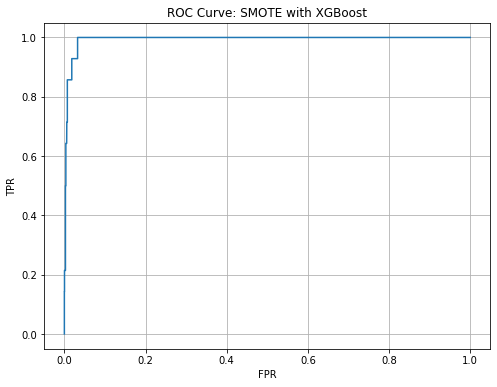

In [71]:
predictions = cross_val_predict(pipeline, X, y, cv=10, method='predict_proba')
margins = predictions[:, 1]
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y, margins)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve: SMOTE with XGBoost")
plt.grid()
plt.show()

Now we can have a look at which planets XGBoost classified as potentially habitable.  Again, those planets are shown in green, non-habitable planets are blue, and the true positives are circled in red.  This time the results look pretty good.  Most of the false positives in this case are planets which might well be considered potentially habitable under more optimistic criteria.

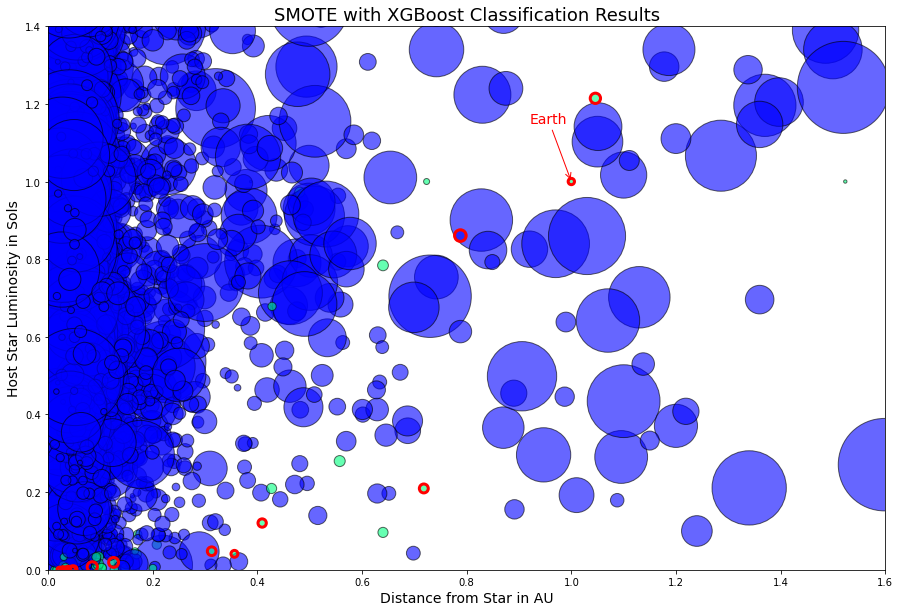

In [72]:
Z = X['SemiMajorAxisAU'] 
Y = X['HostStarSlrLum']
S = X['RadEarth']

plt.figure(figsize=(15, 10))
plt.title('SMOTE with XGBoost Classification Results',fontsize=18)
plt.xlabel('Distance from Star in AU',fontsize=14)
plt.ylabel('Host Star Luminosity in Sols',fontsize=14)
plt.axis([0, 1.6, 0, 1.4])

plt.scatter(Z, Y, (S**2)*40, alpha=0.6, c=preds, cmap=plt.cm.winter, edgecolors='k')

J = pos_df['SemiMajorAxisAU']
K = pos_df['HostStarSlrLum']
I = pos_df['RadEarth']

plt.scatter(J, K, (I**2)*40, linewidths=3, c='none', edgecolors='red')

plt.annotate("Earth",
            xy=(1, 1), xycoords='data',
            xytext=(.92, 1.15), textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color='r'),
            size=14, c='r')
    

plt.show()

### Analysis of the Host Stars

Now that we have examined the planets, we can take a look at the stars they orbit. We will start by selecting some features that pertain to the host stars and creating a new dataframe. Next we need to drop the duplicate rows, since a number of planets in the dataset orbit the same host stars. 

In [90]:
star_features = ['HostStarMassSlrMass', 'HostStarRadiusSlrRad', 'HostStarTempK', 'HostStarMetallicity']
star_df = oec[star_features]

In [91]:
before_rows = len(star_df)
star_df = star_df.drop_duplicates()
after_rows = len(star_df)
print('Length: ', len(star_df))
print('Number of rows dropped:', before_rows - after_rows)
star_df.head()

Length:  2578
Number of rows dropped: 1006


,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarTempK,HostStarMetallicity
0,0.889,1.362,5627.0,-0.31
2,0.460,0.450,3584.0,0.00
5,1.070,1.020,5777.0,0.12
8,0.690,NaN,4347.0,NaN
9,0.830,0.790,5132.0,-0.01


Now, that we have our new dataframe, we can look at some basic statistics. The average host star's mass is just slightly more than that of the Sun, while the average radius is about 1.6 times the Sun's. Notably, there is considerably more variation with regard to host star radius than with host star mass. The average temperature is a little lower than that of the Sun, but in general the Sun appears to be a very normal star.

In [93]:
star_df.describe()

,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarTempK,HostStarMetallicity
count,2533.000000,2382.000000,2512.000000,2109.000000
mean,1.003970,1.634162,5521.353981,0.019745
std,0.328001,3.487825,1086.519784,0.180332
min,0.012000,0.000014,540.000000,-2.090000
25%,0.850000,0.830000,5134.250000,-0.040000
50%,0.986000,1.000000,5643.000000,0.020000
75%,1.128000,1.270000,5950.000000,0.100000
max,4.500000,51.100000,29300.000000,0.560000


The correlation matrix shows to what extent these features are related to one another. There is a small correlation between radius and mass, and also between temperature and mass, but not much else to see.

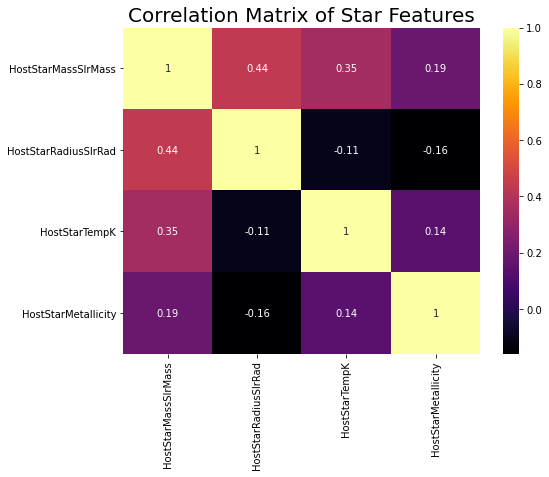

In [94]:
corrmat = star_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,6))
plt.title('Correlation Matrix of Star Features',fontsize=20)
ax = sns.heatmap(star_df[top_corr_features].corr(), annot=True, cmap='inferno')
bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

The plot below shows host star mass in solar masses on the x axis and temperature in Kelvins on the y axis. The size of the circle corresponds to host star radius. The colors in this plot are randomized, and host star metallicity is not shown because we are missing values for some important examples, which would cause them not to appear in the plot.  Most of the stars hover near the bottom of the plot, but there are three very hot stars in the upper left corner that are so small they are dificult to see.

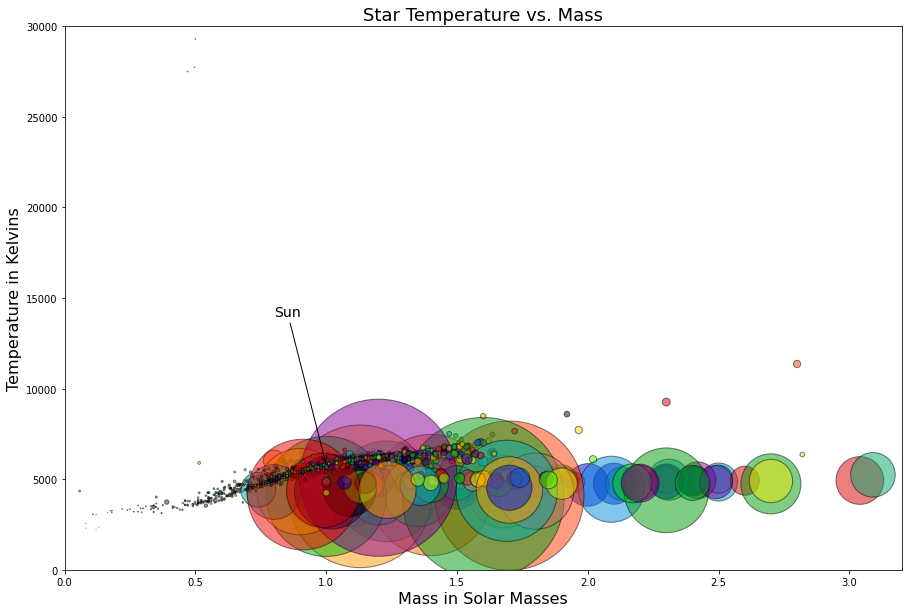

In [95]:
X = star_df['HostStarMassSlrMass']
Y = star_df['HostStarTempK']
S = star_df['HostStarRadiusSlrRad']

plt.figure(figsize=(15, 10))
colors = np.random.rand(2578)
plt.title('Star Temperature vs. Mass',fontsize=18)
plt.xlabel('Mass in Solar Masses',fontsize=16)
plt.ylabel('Temperature in Kelvins',fontsize=16)
plt.axis([0, 3.2, 0, 30000])
plt.scatter(X, Y, S**2 * 10, alpha=0.5, c=colors, cmap="nipy_spectral", edgecolors='k')

plt.annotate("Sun", 
            xy=(1, 5778), xycoords='data',
            xytext=(0.8, 14000), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            size=14)
plt.show()

The next plot is similar to the previous one, but now color corresponds to metallicity, and we are focusing on the temperature range from 2500 to 8000 kelvins. In both of these plots we clearly see groups of stars, although metallicity seems to have little relation to them. In fact metallicity is relatively uniform except for one anamolous star with a very low value.

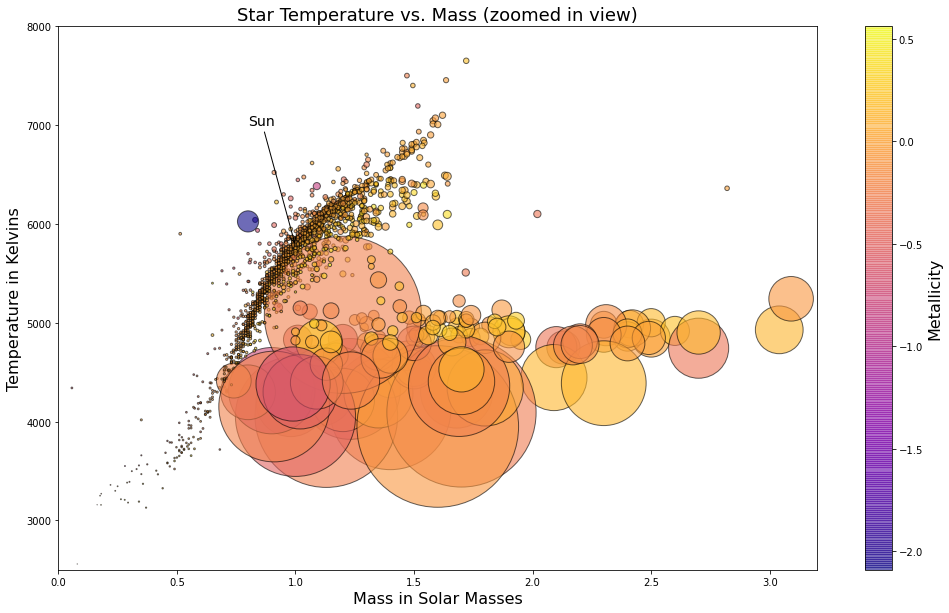

In [96]:
X = star_df['HostStarMassSlrMass']
Y = star_df['HostStarTempK']
S = star_df['HostStarRadiusSlrRad']

plt.figure(figsize=(17, 10))
plt.title('Star Temperature vs. Mass (zoomed in view)',fontsize=18)
plt.xlabel('Mass in Solar Masses',fontsize=16)
plt.ylabel('Temperature in Kelvins',fontsize=16)
plt.axis([0, 3.2, 2500, 8000])
stars = plt.scatter(X, Y, S**2 * 10, alpha=0.6, c=star_df['HostStarMetallicity'], cmap="plasma", edgecolors='k')
cbar = plt.colorbar(stars)
#cbar.set_ticks([])
cbar.set_label('Metallicity',fontsize=16)

plt.annotate("Sun", 
            xy=(1, 5778), xycoords='data',
            xytext=(0.8, 7000), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            size=14)
plt.show()

### Clustering

At first glance the plots above seem to show two major clusters and one minor one. We will now use clustering algorithms to try to make sense of the data. We will begin with KMeans, probably the most common technique for clustering. Kmeans works by dividing the data into k clusters, assigning data points to clusters based on euclidean distance to local centroids (means). We will run KMeans several times, trying out different values for k. Unlike classification, the results yielded by clustering algorithms cannot generally be tested for accuracy, since the algorithm defines the clusters.

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [99]:
# Select features for clustering and normalize the data
kmeans_features = ['HostStarMassSlrMass', 'HostStarRadiusSlrRad', 'HostStarTempK']
kmeans_df = star_df[kmeans_features]
kmeans_df = kmeans_df.dropna()

X = StandardScaler().fit_transform(kmeans_df)
X

array([[-0.42100822, -0.07760848,  0.08380328],
       [-1.84560608, -0.33611537, -1.81262057],
       [ 0.18004589, -0.17454856,  0.22304145],
       ...,
       [ 2.27211268,  3.58967466, -0.93634837],
       [-0.05240597, -0.11785845, -0.1204127 ],
       [ 0.24646071, -0.15470703,  0.47274189]])

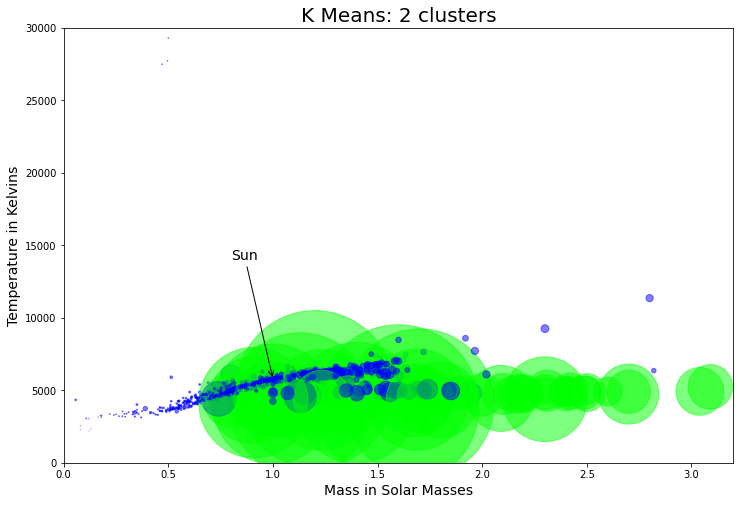

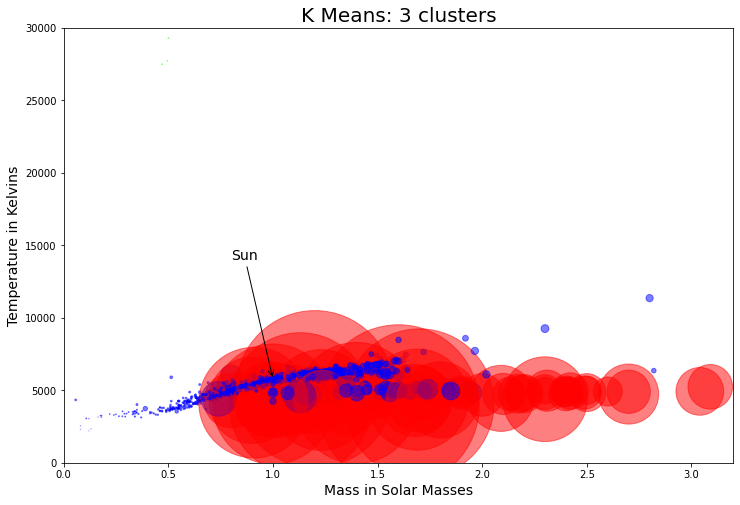

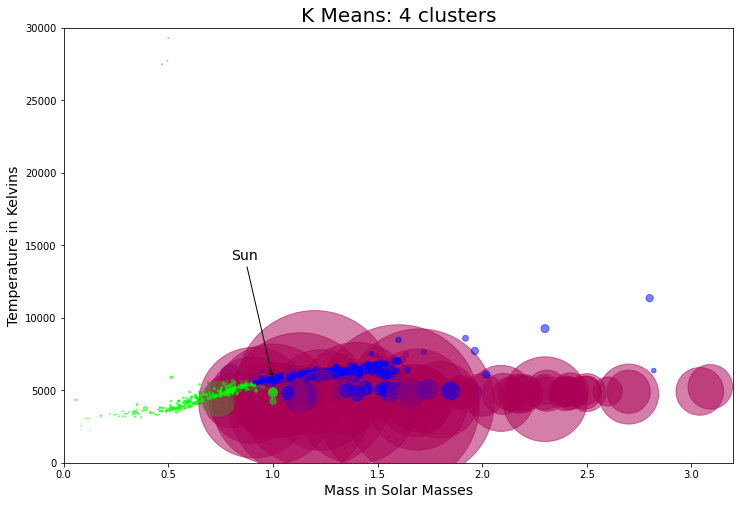

In [107]:
Z = kmeans_df['HostStarMassSlrMass']
Y = kmeans_df['HostStarTempK']
S = kmeans_df['HostStarRadiusSlrRad']
for i in [2, 3, 4]:
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(X)
    plt.figure(figsize=(12, 8))
    plt.title('K Means: %d clusters'%(i),fontsize=20)
    plt.xlabel('Mass in Solar Masses',fontsize=14)
    plt.ylabel('Temperature in Kelvins',fontsize=14)
    plt.axis([0, 3.2, 0, 30000])
    plt.scatter(Z, Y, S**2 * 10, alpha=0.5, c=model.labels_.astype(float), cmap="brg")

    plt.annotate("Sun", 
            xy=(1, 5778), xycoords='data',
            xytext=(0.8, 14000), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            size=14)
plt.show()

Three clusters seems like the most sensible arrangement. The plot below shows the data organized into 3 clusters, but focusing specifically on the bottom portion of the plot. It looks like some of the stars that we might expect to belong to the bottom cluster have been lumped in with the top cluster. This might be because KMeans often has trouble when there are elongated shapes in data.

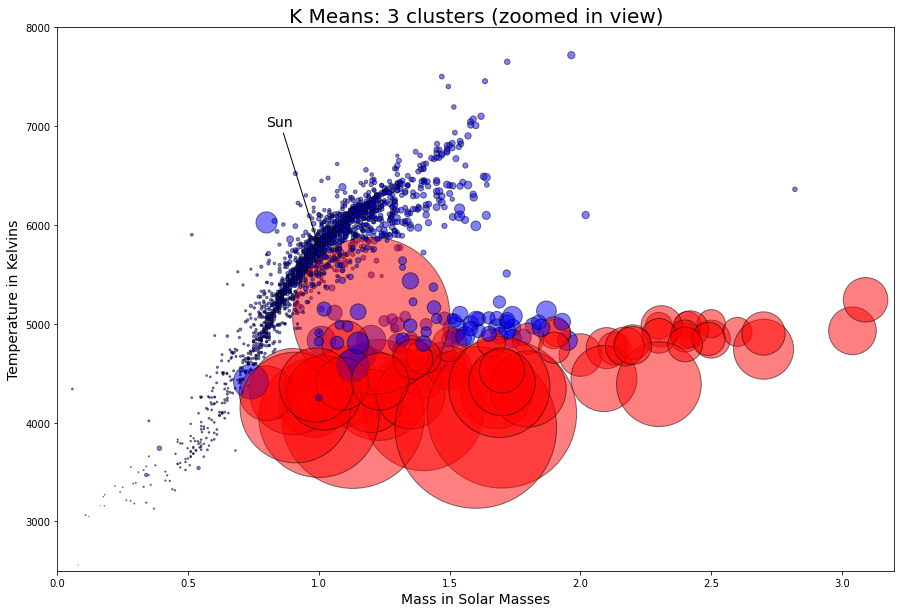

In [102]:
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(X)
plt.figure(figsize=(15, 10))
plt.title('K Means: 3 clusters (zoomed in view)',fontsize=20)
plt.xlabel('Mass in Solar Masses',fontsize=14)
plt.ylabel('Temperature in Kelvins',fontsize=14)
plt.axis([0, 3.2, 2500, 8000])
plt.scatter(Z, Y, S**2 * 10, alpha=0.5, c=model.labels_.astype(float), cmap="brg", edgecolors='k')

plt.annotate("Sun", 
            xy=(1, 5778), xycoords='data',
            xytext=(0.8, 7000), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            size=14)
plt.show()

We can try another clustering technique to see if we obtain different results. A gaussian mixture model works by comparing probablity densities, which can be stretched out in different directions. This means that the clusters can also be elongated when necessary.

In [85]:
from sklearn.mixture import GaussianMixture

In [103]:
gmm = GaussianMixture(n_components=2, covariance_type='diag', n_init=7)
clusters = gmm.fit_predict(X)

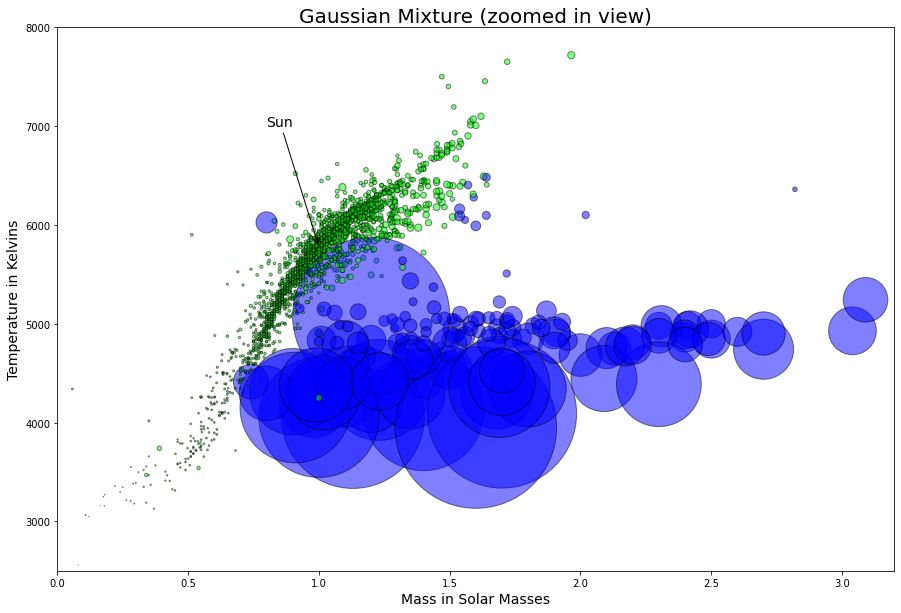

In [104]:
plt.figure(figsize=(15, 10))
plt.title('Gaussian Mixture (zoomed in view)',fontsize=20)
plt.xlabel('Mass in Solar Masses',fontsize=14)
plt.ylabel('Temperature in Kelvins',fontsize=14)
plt.axis([0, 3.2, 2500, 8000])
plt.scatter(Z, Y, S**2 * 10, alpha=0.5, c=clusters, cmap="brg", edgecolors='k')

plt.annotate("Sun", 
            xy=(1, 5778), xycoords='data',
            xytext=(0.8, 7000), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            size=14)
plt.show()

The clusters from the gaussian mixture seem to make more sense than those from KMeans, although if anything now the bottom cluster is stealing a few stars that should belong in the top cluster. As mentioned before, clustering differs from classification in that we are not working with predefined classes that could be used to evaluate our results, so different results could be considered equally valid. 

In the case of the star data, the clusters seem to show different stages in the stellar life cycle. The stars in the dense, diagonally oriented group (including the Sun) are probably main sequence stars. This is the first and longest stage in the life of a star. After billions of years, once a main sequence star has fused most of its hydrogen into helium, its outer layers cool and expand, and it becomes a red giant. Red giants form the horizontally oriented cluster of cooler stars with very large radii. Finally, when the star expels its outer layers and only the hot core remains it becomes a white dwarf. These are the three tiny hot stars alone in the upper left corner of the plot. The stars about which our two clustering models disagree could perhaps be those in the process of transitioning from main sequence stars to red giants.

### Reflections

Near the end of the novel *The Great Gatsby*, Fitgerald's narrator, while imagining the first Dutch sailors gazing upon what would one day be New York, says man was "face to face for the last time in history with something commensurate to his capacity for wonder". The passage is beautiful, although the phrase "for the last time in history" seems a tad melodramatic. The study of exoplanets teaches us that as long as humans have an appetite for wonder, the universe will be more than happy to oblige. In fact, one can hardly imagine anything more commensurate to our capacity for wonder than the innumerable worlds out there waiting to be discovered. Of course Fitzgerald's quote fails to mention the fact that the continent those sailors were gazing at was already inhabited. If future generations ever make it to any Earth-like worlds out there, they may find them inhabited as well. Then they will have to decide if their intrusion is justified, even if the inhabitants are mere microbes.

As a final thought, consider the fact that in seven or eight billion years, our own Sun will become a red giant. When this happens it will expand, devouring the innermost planets one by one until finally the Earth too is swallowed up and absorbed into an enormous burning ball of plasma. Of course by this time the oceans will have long since boiled away, and the crust will have melted, rendering this planet totally uninhabitable for any form of life, even bacteria. The lesson to take away from this is that if there is to be a long term future for us and for life as we know it, that future will out there among the stars. And I hope you would agree that a future in which we continue to exist out there among the stars is far more interesting than one in which we do not.